<a href="https://colab.research.google.com/github/yustinaivanova/netology_statistics/blob/master/dz_4_version2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашняя работа №4

In [1]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns
from sklearn.metrics import classification_report

%matplotlib inline

Для датасета kaggle, Credit Card Fraud Detection. https://www.kaggle.com/mlg-ulb/creditcardfraud 

**1. Загрузить датасет**

In [2]:
data = pd.read_csv('creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


**2. Посмотреть отсутствующие значения (какое количество Nan элементов).**

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [4]:
data.isnull().sum()
#NAN нет

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

**3. Основное таргет значение: 1 - сделка была обманной, 0 - честной. Сделать график barplot для этих двух классов из колонки 'Class'. Посчитать количество элементов в классе 1 и в классе 2.**

In [5]:
data.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

{'boxes': [<matplotlib.lines.Line2D at 0x2681cfdde48>],
 'caps': [<matplotlib.lines.Line2D at 0x2682133c1d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x26821343a58>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x26821343240>],
 'whiskers': [<matplotlib.lines.Line2D at 0x2681cfddfd0>,
  <matplotlib.lines.Line2D at 0x2681cfea9b0>]}

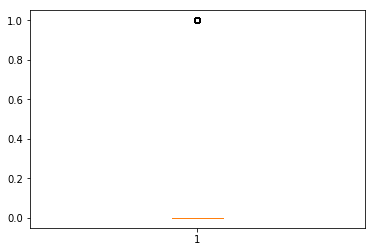

In [6]:
plt.boxplot(data.Class)

**4. Сколько денег было использовано в обманных операциях, а сколько - в нормальных операциях?** Сделать частотный график по колонке Amount для колонки Class по двум независимым выборкам: обманная операция, нормальная операция

In [7]:
data[data.Class==1].Amount.sum()


60127.96999999997

In [8]:
data[data.Class==0].Amount.sum()


25102462.039983638

(array([410.,  40.,  17.,  14.,   2.,   2.,   4.,   1.,   1.,   1.]),
 array([   0.   ,  212.587,  425.174,  637.761,  850.348, 1062.935,
        1275.522, 1488.109, 1700.696, 1913.283, 2125.87 ]),
 <a list of 10 Patch objects>)

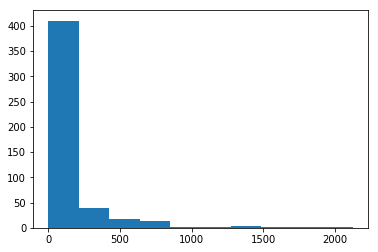

In [9]:
plt.hist(data[data.Class==1].Amount)

(array([2.83903e+05, 3.60000e+02, 3.60000e+01, 1.00000e+01, 2.00000e+00,
        1.00000e+00, 0.00000e+00, 2.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([    0.   ,  2569.116,  5138.232,  7707.348, 10276.464, 12845.58 ,
        15414.696, 17983.812, 20552.928, 23122.044, 25691.16 ]),
 <a list of 10 Patch objects>)

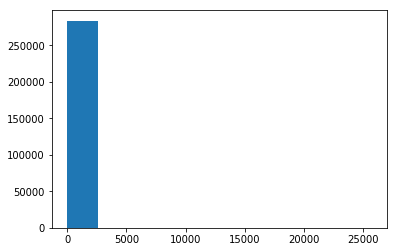

In [10]:
plt.hist(data[data.Class==0].Amount)

**5. Построить графики histograms для всех значений**

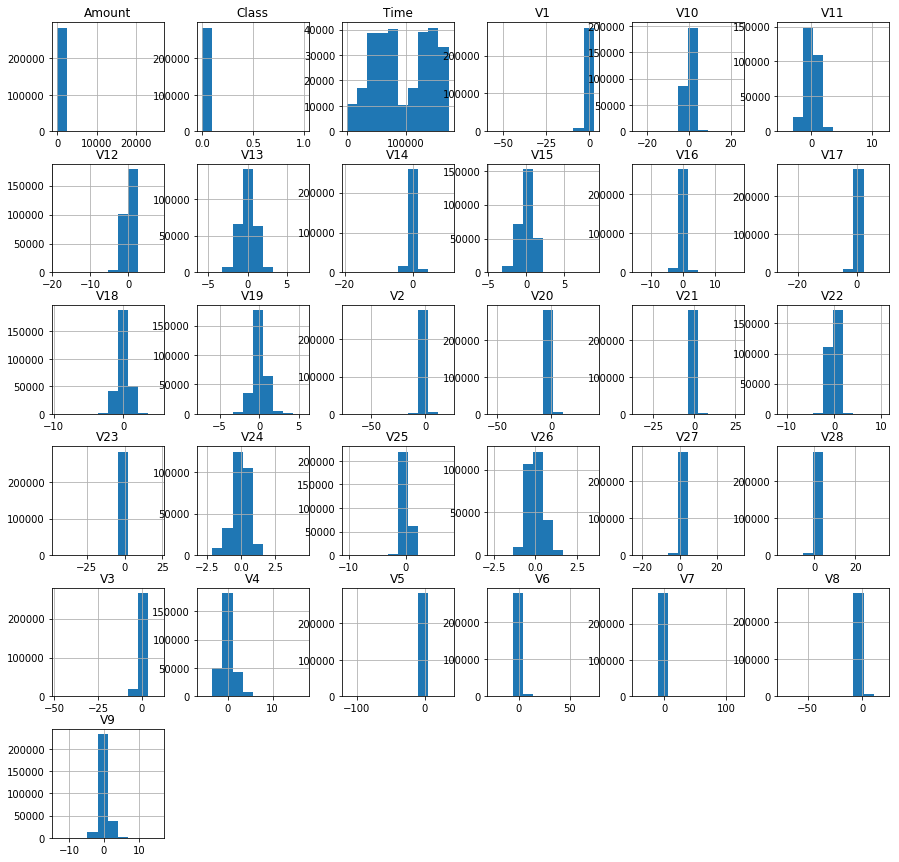

In [11]:
data.hist(figsize=(15,15))
plt.show()

**6. Построить матрицу корреляций для всех значений**

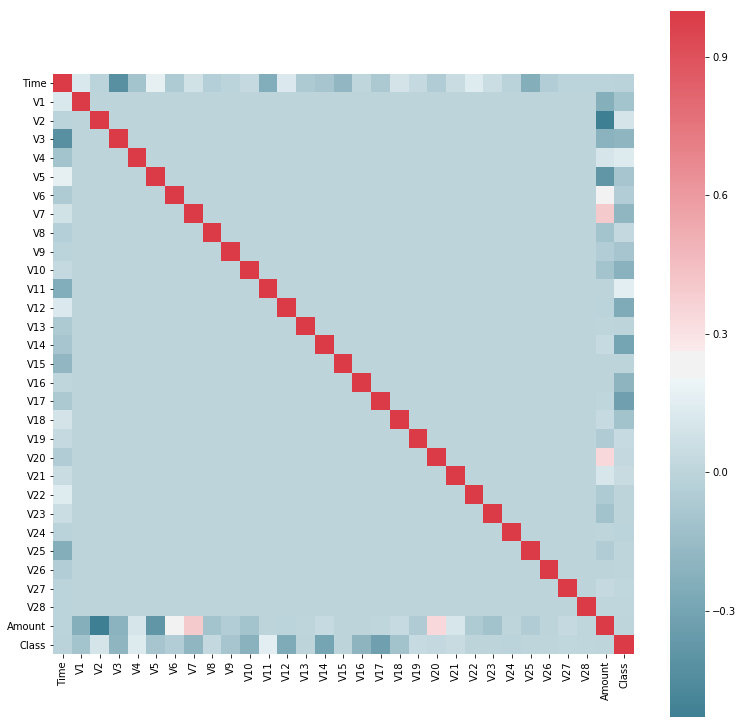

In [12]:
f, ax = plt.subplots(figsize=(13, 13))
corr = data.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

**7. Взять все имеющиеся атрибуты из таблицы для предсказания. Разделить на тренировочные и тестовые. Написать логистическую регрессию. Сделать classification report. Нормализовать значения. Написать логистическую регрессию. Сделать classification report, сравнить с предыдущим report. Есть ли улучшения?**

In [13]:
data_1 = data.iloc[:,:30]
Class = data.Class

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    data_1,
    Class,#то что предсказываем
    test_size = 0.2,# объем тестовой выборки
    random_state = 42#рендомная генерация
)

In [15]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

print('X_train_1 ',len(X_train),'X_test_1 ',len(X_test),'y_train_1 ',len(y_train),'y_test_1 ',len(y_test)) 

X_train_1  227845 X_test_1  56962 y_train_1  227845 y_test_1  56962


In [16]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='liblinear').fit(X_train, y_train)

In [17]:
from sklearn.metrics import classification_report

model_pred = model.predict(X_test)#предсказательная модель

print(classification_report(y_test, model_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.83      0.53      0.65        98

    accuracy                           1.00     56962
   macro avg       0.91      0.77      0.82     56962
weighted avg       1.00      1.00      1.00     56962



In [18]:
headers = list(data.columns.values)
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))

np_scaled = min_max_scaler.fit_transform(data)
df_norm = pd.DataFrame(np_scaled)
df_norm.columns = headers
df_norm.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.000000,0.870385,0.532981,0.762730,-0.373955,0.526877,-0.464663,-0.466370,0.572888,-0.049377,...,0.122369,0.045984,0.327586,-0.217495,0.170244,-0.210886,-0.162048,-0.374607,-0.988352,-1.0
1,-1.000000,0.957084,0.540133,0.680597,-0.456407,0.532241,-0.475617,-0.470249,0.572597,-0.092038,...,0.115680,-0.039526,0.333876,-0.327120,0.174581,-0.107974,-0.167310,-0.373155,-0.999791,-1.0
2,-0.999988,0.870434,0.506235,0.736282,-0.462469,0.524658,-0.437756,-0.459646,0.576085,-0.178795,...,0.130955,0.092060,0.357878,-0.421292,0.119030,-0.194546,-0.169021,-0.376177,-0.970522,-1.0
3,-0.999988,0.883756,0.530608,0.736967,-0.572678,0.531294,-0.448882,-0.466394,0.578868,-0.170001,...,0.119467,0.020554,0.325214,-0.552348,0.228491,-0.221607,-0.164663,-0.371258,-0.990386,-1.0
4,-0.999977,0.877234,0.553040,0.728501,-0.460407,0.525950,-0.472032,-0.462064,0.564967,-0.018101,...,0.122655,0.094541,0.326784,-0.197460,0.132685,0.014994,-0.158878,-0.365020,-0.994551,-1.0


In [19]:
data_2 = df_norm.iloc[:,:30]
Class_2 = df_norm.Class

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    data_2,
    Class_2,#то что предсказываем
    test_size = 0.2,# объем тестовой выборки
    random_state = 42#рендомная генерация
)

In [21]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

print('X_train_1 ',len(X_train),'X_test_1 ',len(X_test),'y_train_1 ',len(y_train),'y_test_1 ',len(y_test)) 

X_train_1  227845 X_test_1  56962 y_train_1  227845 y_test_1  56962


In [22]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='liblinear').fit(X_train, y_train)

In [23]:
from sklearn.metrics import classification_report

model_pred = model.predict(X_test)#предсказательная модель

print(classification_report(y_test, model_pred))
#Без изменений

              precision    recall  f1-score   support

        -1.0       1.00      1.00      1.00     56864
         1.0       0.85      0.52      0.65        98

    accuracy                           1.00     56962
   macro avg       0.92      0.76      0.82     56962
weighted avg       1.00      1.00      1.00     56962



**8. Написать модель RandomForestClassifier на данный датасет и сравнить результаты с логистической регрессией. Почему результаты получились лучше (или хуже). Тренировочные и тестовые данные выбираем одинаковые (те же, что и для логистической регрессии), полученные на шаге 7.**

In [47]:
from sklearn.ensemble import RandomForestClassifier

# создаем модель деревья решений
# выбираем 100 деревьев в качестве параметра
model=RandomForestClassifier(n_estimators=100)

# обучаем модель
model.fit(X_train, y_train)

model_pred = model.predict(X_test)

print(classification_report(y_test, model_pred))

             precision    recall  f1-score   support

       -1.0       1.00      1.00      1.00     56864
        1.0       0.97      0.80      0.88        98

avg / total       1.00      1.00      1.00     56962



In [ ]:
#лучше так как несколько раз определяли решение по деревьям

**9. Уравновесить классы с помощью up-sampling (тестовые данные не меняем, только тренировочные). Написать логистическую регрессию на сгенерированные данные и сравнить результат с моделями, полученными на шаге 7 и 8. В качестве тестовых данных используем один и тот же датасет, полученный на шаге 7.**

In [24]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

ros = RandomOverSampler(random_state=0)

ros.fit(X_train, y_train)
X_resampled, y_resampled = ros.fit_sample(X_train, y_train)
print('Количество элементов до операции:', len(X_train))
print('Количество элементов после операции:', len(X_resampled))

Количество элементов до операции: 227845
Количество элементов после операции: 454902


In [25]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='liblinear').fit(X_resampled, y_resampled)

In [26]:
from sklearn.metrics import classification_report

model_pred = model.predict(X_test)#предсказательная модель

print(classification_report(y_test, model_pred))

              precision    recall  f1-score   support

        -1.0       1.00      0.98      0.99     56864
         1.0       0.07      0.92      0.12        98

    accuracy                           0.98     56962
   macro avg       0.53      0.95      0.56     56962
weighted avg       1.00      0.98      0.99     56962



# Задание для интересующихся time-series (временными рядами)

Есть датасет потребления электроэнергии.

In [ ]:
import pandas as pd
url="http://yustiks.ru/dataset/household_power_consumption.txt"

In [4]:
df = pd.read_csv(url, sep=';', 
                 parse_dates={'dt' : ['Date', 'Time']}, infer_datetime_format=True, 
                 low_memory=False, na_values=['nan','?'], index_col='dt')

In [5]:
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
dt,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [ ]:
# Хороший пример для LSTM модели можно найти здес